# Exploring NNET's
---------------------
In this project we will explore different optimizing options of neural networks using MLPClassifier and later build a model to classify Breast Cancer Data.

In [54]:
#IMPORTS
#packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

#processing & validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

#modles
from sklearn.neural_network import MLPClassifier

#datasets
from sklearn.datasets import make_moons, load_breast_cancer

#settings
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

### Controlling complexity of Neural Networks
There are different ways to tune Neural networks. We will look into below options.
- tune hidden layers
- tune hidden units (nodes) in each hidden layer
- tune alpha parameter (regularization)
- we will also look into a worth noting option to the end.

In [55]:
#split data
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)

Firstly we shall run a model with defaults and visualize a scatter plot with a decision boundary

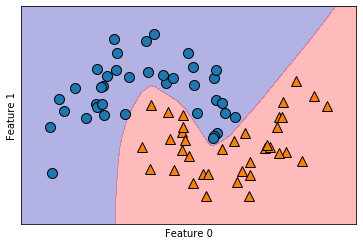

In [56]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

This is a relatively smooth non linear decison boundary. Below are the defaults used in this learning.
- hidden layer: 1
- hidden units: 100
- alpha: 0.0001
- solver: ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
- activation: ‘relu’, the rectified linear unit function

Now let's tweak some of these parameters to tune the neural networks.

**Note**: going forward we will use *lbfgs* for weight optimization and *relu* for activation function.

------------------------
#### Hidden layers
Keeping all other parameters constant, we shall train model using 1,2,3 and 4 hidden layers with 10 hidden units in each layer.

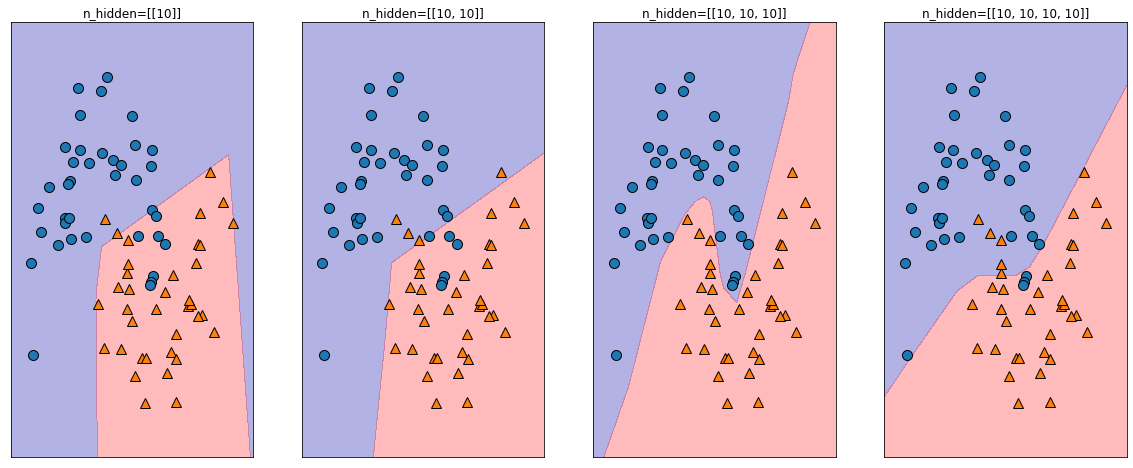

In [57]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8))
for ax, n_hidden_nodes in zip(axes, [[10],[10,10],[10,10,10],[10,10,10,10]]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=n_hidden_nodes)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden=[{}]".format(n_hidden_nodes))

As we increase the number of hidden layers we can see that the decision boundary is becoming more linear. Also we can say that overfit is being reduced as we increase number of hidden layers.

#### Hidden Units
We shall set hidden layers to 3 as it seems to be a decent model and we shall vary hidden units 10, 100 and 200 units for each model and also try a model with varying units for each hidden layer (10, 100, 200).

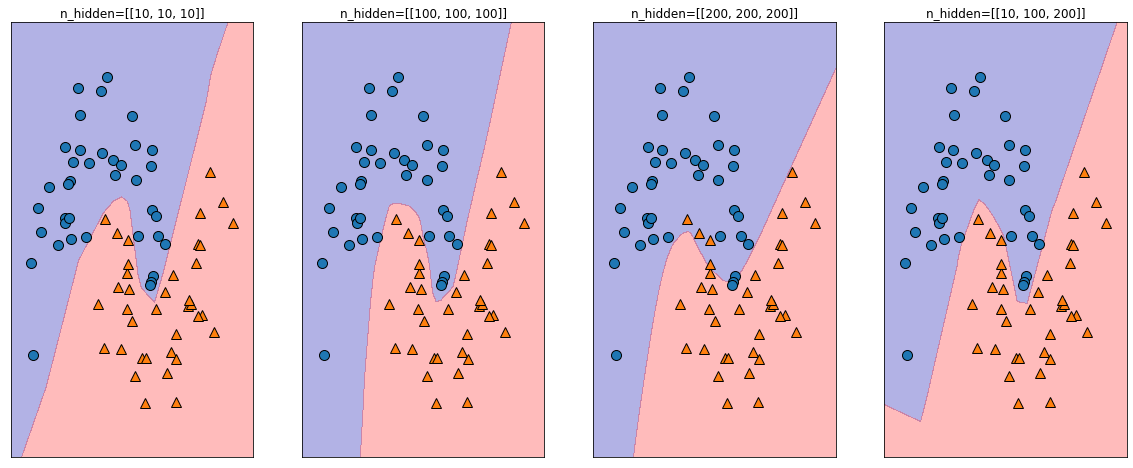

In [58]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8))
for ax, n_hidden_nodes in zip(axes, [[10,10,10], [100,100,100], [200,200,200], [10,100,200]]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=n_hidden_nodes)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden=[{}]".format(n_hidden_nodes))

For this simple dataset using more number of hidden units is overfitting. For now 3 hidden layers with 10 hidden units in each is working the best.

#### Alpha parameter
We can use this parameter (l2 regularization) to shrink the weights towards zero.

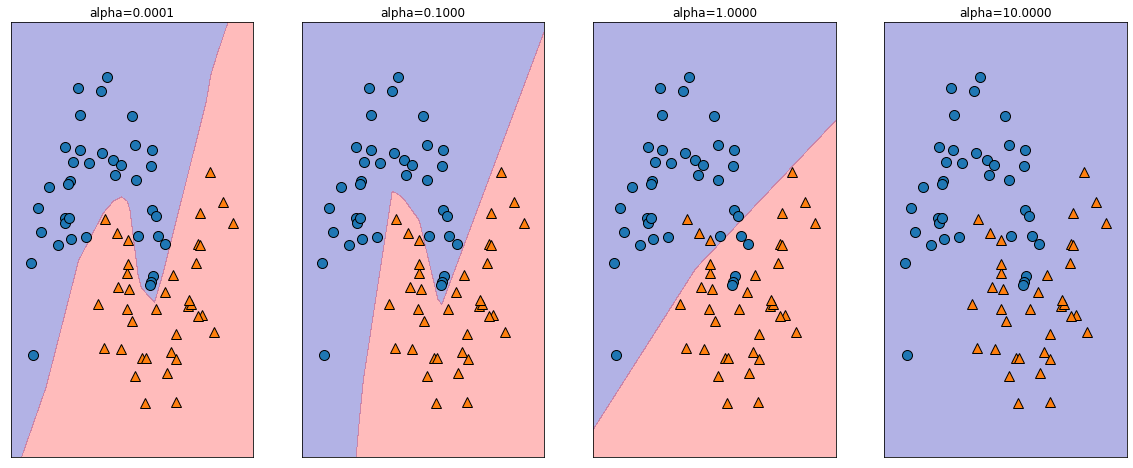

In [59]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8))
for ax, alpha in zip(axes, [0.0001, 0.1, 1, 10]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10,10], alpha=alpha)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("alpha={:.4f}".format(alpha))

Increasing alpha (a.k.a penality term ) may mix high variance but in our case low alpha (0.0001) seems to work just fine. Too high alpha value will increase bias and too low will increase variance.

#### Initial weights
An important property of neural networks is that their weights are set randomly before learning is started, and this random initialization affects the model that is learned.

Keeping all the other parameters constant, we will still achieve different results if randon_state is set to different values. This is worth keeping in mind when working with smaller neural networks.

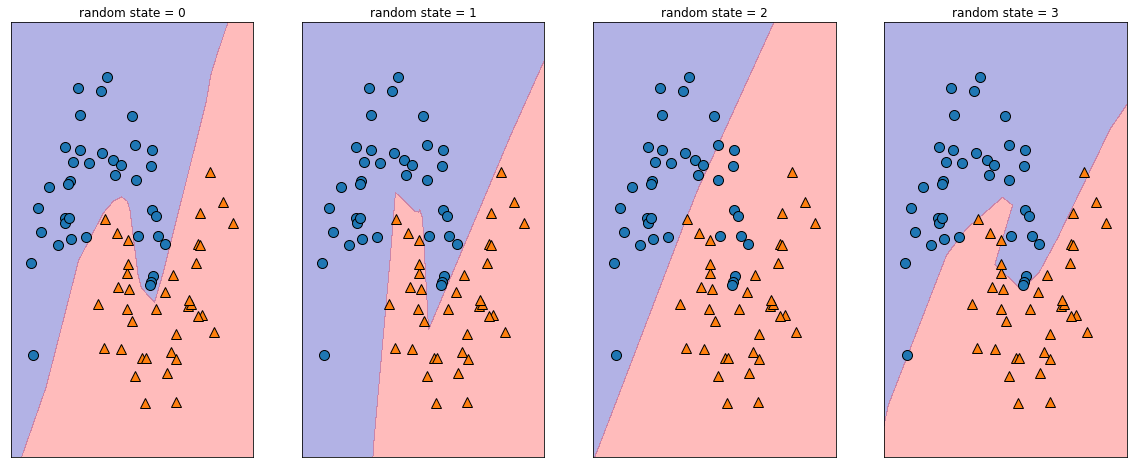

In [60]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[10,10,10])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("random state = {}".format(i))

---------------------------
## MLPClassifier on Breast Cancer data
Features of this dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

Target:
Diagnosis (M = malignant, B = benign)

More information on this dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

In [61]:
#load data and split to train and test
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

Running with defaults

In [62]:
#fit model and calculate accuracy score
mlp = MLPClassifier(max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.93
Accuracy on test set: 0.90


Accuracy achieved is decent but lets tune the model and improve it.

#### Tuning and fitting model

In [63]:
#function with defaults to train data using cross validation to find best performing model
def model_train(xtrain, ytrain, hidden_sizes=[100], alpha=0.0001):
    mlp = MLPClassifier(max_iter=1000, random_state=1, hidden_layer_sizes=hidden_sizes, alpha=alpha)
    
    cv_scores = {}
    for cross_val in np.arange(2,11):
        scores = cross_val_score(mlp, xtrain, ytrain, cv=cross_val, scoring="accuracy")
        avg_score = np.mean(scores)
        cv_scores[cross_val] = avg_score
    
    return max(cv_scores.values())

Finding optimal hidden units

In [64]:
best_hidden_units = {}
hidden_units = [10,50,100,200,500]
for idx, units in enumerate(hidden_units):
    score = model_train(X_train, y_train, hidden_sizes=units)
    best_hidden_units[idx] = score
    
units_key = max(best_hidden_units, key=best_hidden_units.get)

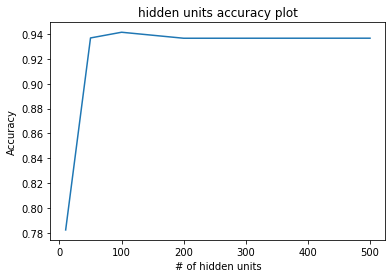

Optimal number of hidder units 100 achieved accuracy 0.941


In [65]:
#visualize accuracy scores
plt.plot(hidden_units, list(best_hidden_units.values()))
plt.title("hidden units accuracy plot")
plt.xlabel("# of hidden units")
plt.ylabel("Accuracy")
plt.show();

print("Optimal number of hidder units {} achieved accuracy {:.3f}".format(hidden_units[units_key], 
                                                                          best_hidden_units[units_key]))

Finding optimal hidden layers

In [66]:
best_hidden_layer = {}
hidden_layers = [[100],[100,100],[100,100,100]]
for idx, layers in enumerate(hidden_layers):
    score = model_train(X_train, y_train, hidden_sizes=layers)
    best_hidden_layer[idx] = score
    
layers_key = max(best_hidden_layer, key=best_hidden_layer.get)

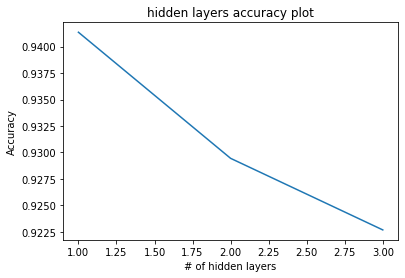

Optimal number of hidder layers [100] achieved accuracy 0.941


In [67]:
#visualize accuracy scores
plt.plot([1,2,3], list(best_hidden_layer.values()))
plt.title("hidden layers accuracy plot")
plt.xlabel("# of hidden layers")
plt.ylabel("Accuracy")
plt.show();

print("Optimal number of hidder layers {} achieved accuracy {:.3f}".format(hidden_layers[layers_key],
                                                                           best_hidden_layer[layers_key]))

#### Finding optimal alpha

In [68]:
best_alpha = {}
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10]
for idx, a in enumerate(alpha):
    score = model_train(X_train, y_train, hidden_sizes=[100], alpha=a)
    best_alpha[idx] = score
    
alpha_key = max(best_alpha, key=best_alpha.get)

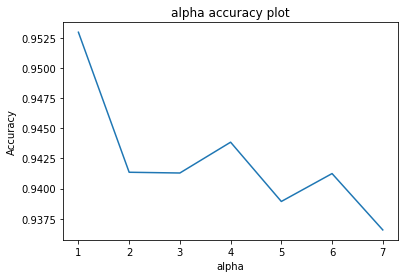

Optimal alpha 0.000010 achieved accuracy 0.953


In [69]:
#visualize accuracy scores
plt.plot([1,2,3,4,5,6,7], list(best_alpha.values()))
plt.title("alpha accuracy plot")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.show()

print("Optimal alpha {:.6f} achieved accuracy {:.3f}".format(alpha[alpha_key], best_alpha[alpha_key]))

Below are the observations
- **hidden units**: 100 units worked best which is the default
- **hidden layers**: increasing layers did not improve our model.
- **alpha**: reducing the alpha gave us better accuracy. Looks like there was bias when alpha 0.0001 which is corrected by reducing it to 0.00001

The Accuracy of 0.953 is good but this can be better. Let's standardize the input data and fit the model again using these parameters

In [70]:
#standardize training data
scaler = StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

#fit model
train_score = model_train(X_train, y_train, hidden_sizes=[100], alpha=0.00001)
test_score = model_train(X_test, y_test, hidden_sizes=[100], alpha=0.00001)
print("Accuracy on training set: {:.3f}".format(train_score))
print("Accuracy on test set: {:.3f}".format(test_score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy on training set: 0.953
Accuracy on test set: 0.973


### Final comments
Standardizing the data improve the accuracy and we have much better results. We have also dealt with over fitting as the test set accuracy is better than training set.

The warning we received is because the optimization did not converge even after 1000 iterations. Further increasing it is not recommended as it may not converge usually if it did not after 1000 iterations.

#### Things to do to further improve the model
- Perform standardization before tuning the model
- Create confusion matrix to check how good True positive rate is as we are dealing with predicting Breast cancer and we need to be accurate with finding positive cases.